TP3

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf


EX1

Q1

In [185]:
# Define the line parameters
m = 0.8 # slope
b = 2.5 # intercept

# Define the sample size and range
n = 100000 
x_min = -10 
x_max = 10 

# Generate x values uniformly in the range
x = np.random.uniform(x_min, x_max, n)

# Generate y values around the line with some noise
y = m * x + b + np.random.normal(0, 1, n)


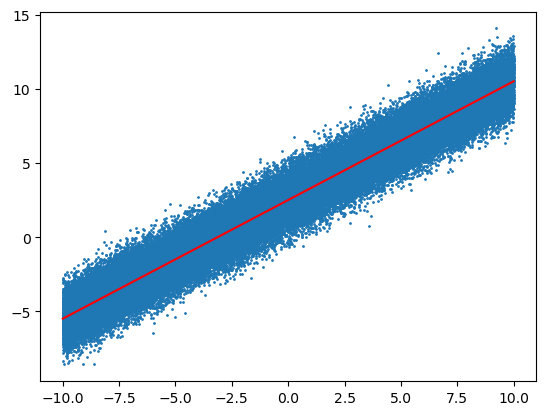

In [186]:
# Plot the points and the line
plt.scatter(x, y, s=1)
plt.plot([x_min, x_max], [m * x_min + b, m * x_max + b], c='r')
plt.show()

Q2

In [187]:
# Create a model with one neuron using keras
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(1,))) #on utilise la fonction d'activation linéaire par défaut
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [188]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError())

l'éxécution ci-dessous prend 5 min

3125/3125 [==============================] - 10s 3ms/step


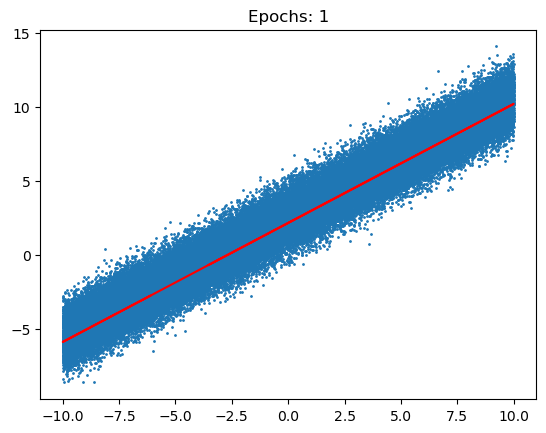

Epoch 1/2
3125/3125 [==============================] - 12s 4ms/step - loss: 1.0093
Epoch 2/2
3125/3125 [==============================] - 8s 2ms/step


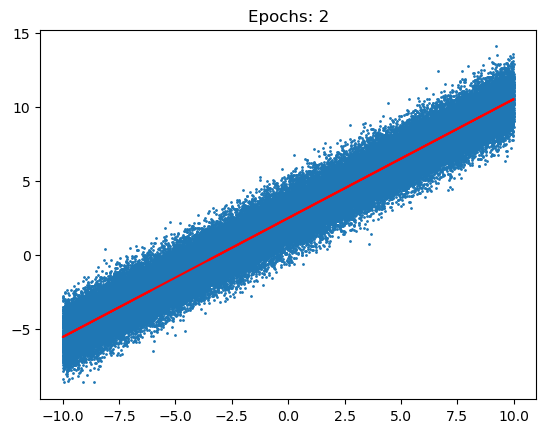

Epoch 1/3
3125/3125 [==============================] - 11s 4ms/step - loss: 0.9953
Epoch 2/3
3125/3125 [==============================] - 7s 2ms/step - loss: 0.9954
Epoch 3/3
3125/3125 [==============================] - 7s 2ms/step


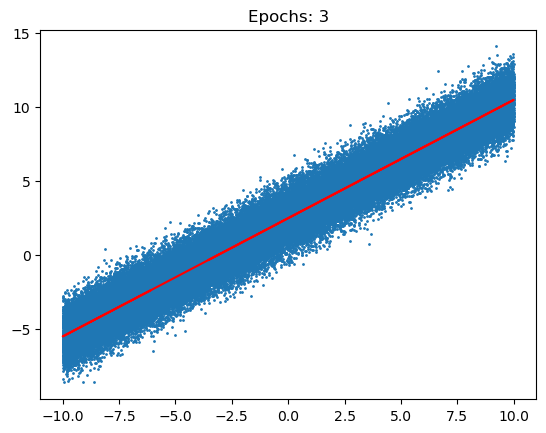

Epoch 1/4
3125/3125 [==============================] - 7s 2ms/step - loss: 0.9953
Epoch 2/4
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9954
Epoch 3/4
3125/3125 [==============================] - 7s 2ms/step - loss: 0.9953
Epoch 4/4
3125/3125 [==============================] - 5s 2ms/step


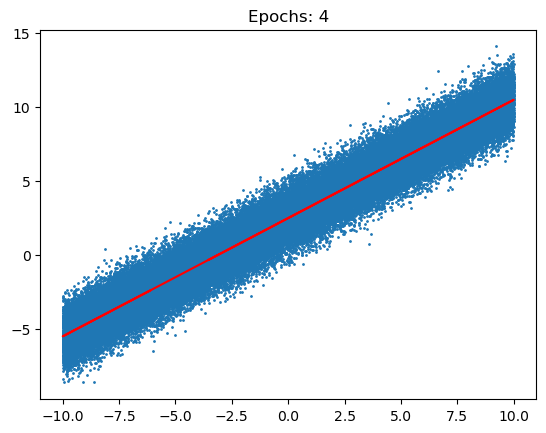

Epoch 1/5
3125/3125 [==============================] - 8s 3ms/step - loss: 0.9953
Epoch 2/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.9954
Epoch 3/5
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9953
Epoch 4/5
3125/3125 [==============================] - 8s 3ms/step - loss: 0.9953
Epoch 5/5
3125/3125 [==============================] - 6s 2ms/step


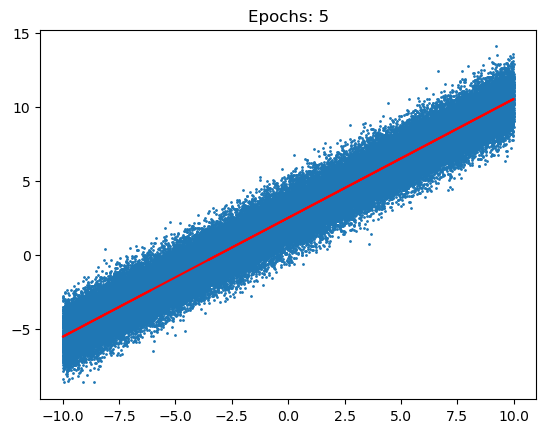

In [189]:
# Train the model on different epochs
for epoch in range(1,6):
    model.fit(x, y, epochs=epoch)
    # Get the predicted y values from the model
    y_pred = model.predict(x)

    # Plot the points and the predicted line
    plt.scatter(x, y, s=1)
    plt.plot(x, y_pred, c='r')
    plt.title(f'Epochs: {epoch}')
    plt.show()

Exercice 2

In [190]:
# Define the curve parameters
a = 2 # coefficient of x^2
b = 2 # coefficient of x^3
c = 0.5 # coefficient of x^4

# Define the sample size and range
n = 100000 # number of points
x_min = -10 # minimum x value
x_max = 10 # maximum x value

# Generate x values uniformly in the range
x = np.random.uniform(x_min, x_max, n)

# Generate y values around the curve with some noise
y = (x-1)*x*(x+1)*(x+2)
y_noise = y + np.random.normal(0, 0.5, n)

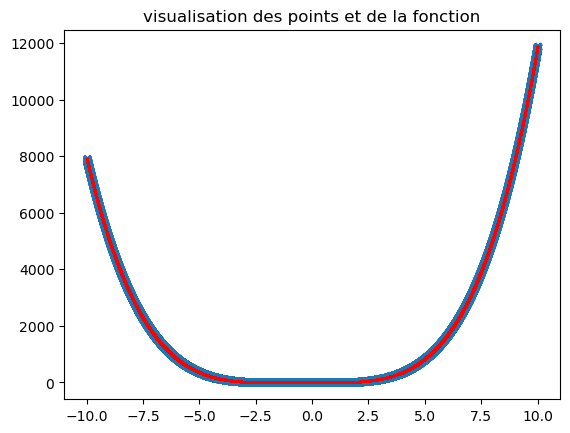

In [191]:
# Plot the points and the curve
plt.scatter(x, y_noise, s=20, marker='x')
plt.scatter(x,y, c='r', s=0.2)
plt.title('visualisation des points et de la fonction')

plt.show()

In [192]:
# Create different models with different layers using keras
models = []
layers = [1, 2, 3] # number of layers to test
neurons = [10, 20, 30] # number of neurons per layer to test
for layer in layers:
    for neuron in neurons:
        model = keras.Sequential()
        model.add(keras.layers.Dense(neuron, input_shape=(1,), activation='relu'))
        for _ in range(layer - 1):
            model.add(keras.layers.Dense(neuron, activation='relu'))
        model.add(keras.layers.Dense(1))
        model.summary()
        models.append(model)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 10)                20        
                                                                 
 dense_57 (Dense)            (None, 1)                 11        
                                                                 


Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 20)                40        
                                                                 
 dense_59 (Dense)            (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 30)                60        
                                                                 
 dense_61 (Dense)            (None, 1)

In [193]:
def get_total_number_of_neurons(model, include_output_layer):
    '''
    Args:
        model: Keras model
        include_output_layer: A boolean parameter. Whether or not to include output layer's neurons into the calculation

    Returns: number of neurons in the given model
    '''
    num_layers = len(model.layers)
    total_num_of_neurons = 0
    for layer_index in range(num_layers):
        layer = model.layers[layer_index]
        # since we multiply layer output dimensions, initial value is set to 1.
        num_neurons_in_layer = 1
        for i in range(1, len(layer.output.shape)):
            try:
                # when it is a valid layer to count neurons, an output dimension of the layer can be convertible to int.
                num_neurons_in_layer *= int(layer.output.shape[i])
            except Exception:
                # if the output dimension of layer cannot be convertible to int,
                # just pass that layer since it is not a valid layer to count neurons
                pass
        # if num_neurons_in_layer is not still 1, it means we have a valid layer to count neurons
        if not num_neurons_in_layer == 1:
            # when it is an output layer
            if layer_index == (num_layers - 1):
                if include_output_layer:
                    total_num_of_neurons += num_neurons_in_layer
            else:  # when it is not an output layer
                total_num_of_neurons += num_neurons_in_layer
    return total_num_of_neurons

Epoch 1/2


3125/3125 [==============================] - 9s 3ms/step - loss: 11050595.0000
Epoch 2/2
3125/3125 [==============================] - 10s 3ms/step


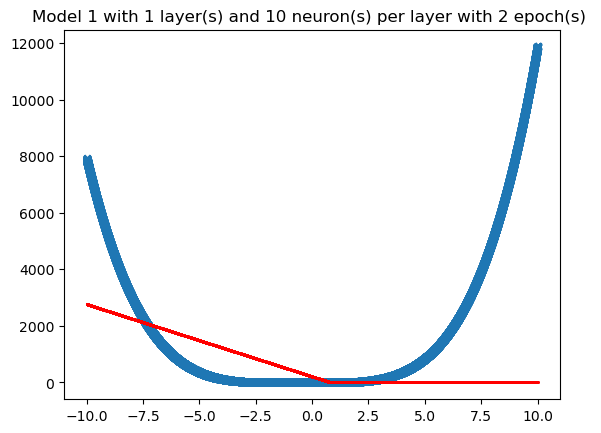

Epoch 1/2
3125/3125 [==============================] - 9s 3ms/step - loss: 9882221.0000
Epoch 2/2
3125/3125 [==============================] - 8s 3ms/step


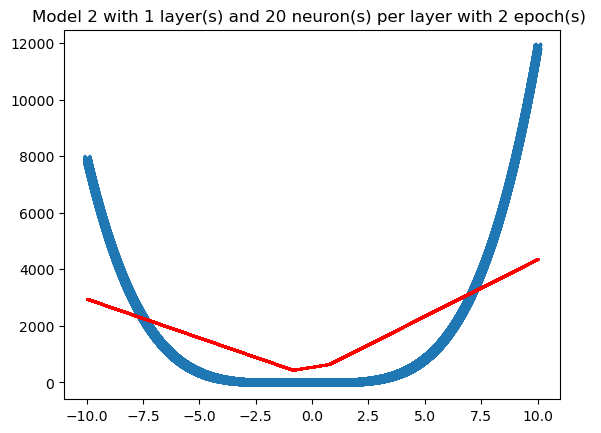

Epoch 1/2
3125/3125 [==============================] - 8s 2ms/step - loss: 9662493.0000
Epoch 2/2
3125/3125 [==============================] - 7s 2ms/step


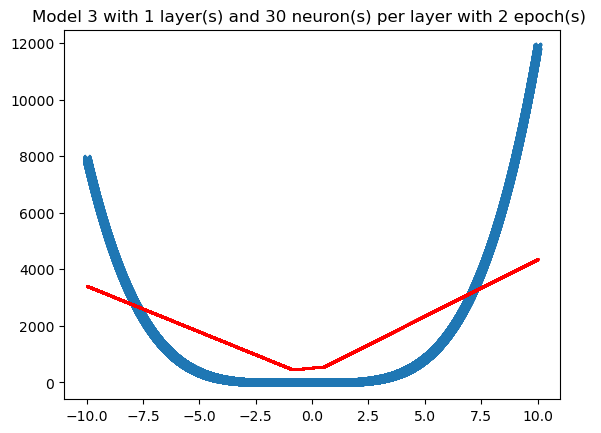

Epoch 1/2
3125/3125 [==============================] - 9s 2ms/step - loss: 7389702.5000
Epoch 2/2
3125/3125 [==============================] - 8s 2ms/step


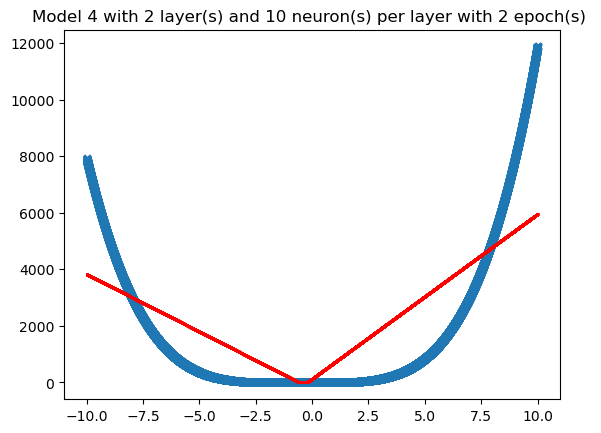

Epoch 1/2
3125/3125 [==============================] - 9s 3ms/step - loss: 5157118.0000
Epoch 2/2
3125/3125 [==============================] - 8s 2ms/step


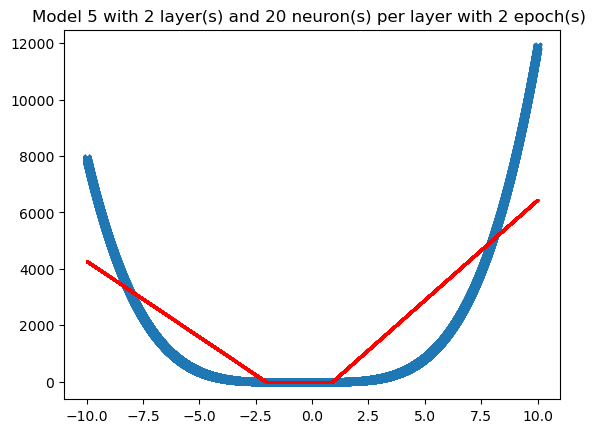

Epoch 1/2
3125/3125 [==============================] - 9s 2ms/step - loss: 4290996.0000
Epoch 2/2
3125/3125 [==============================] - 7s 2ms/step


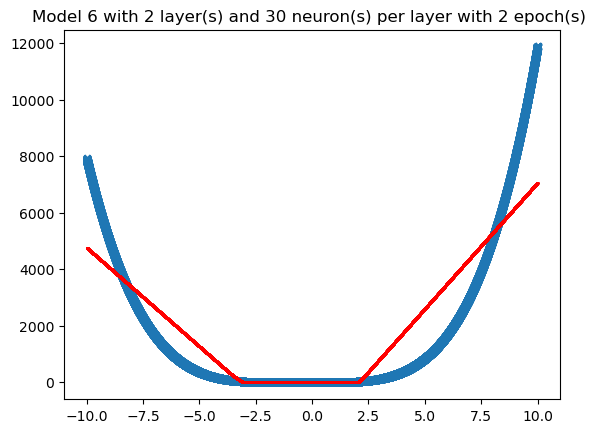

Epoch 1/2
3125/3125 [==============================] - 13s 3ms/step - loss: 3985375.0000
Epoch 2/2
3125/3125 [==============================] - 6s 2ms/step


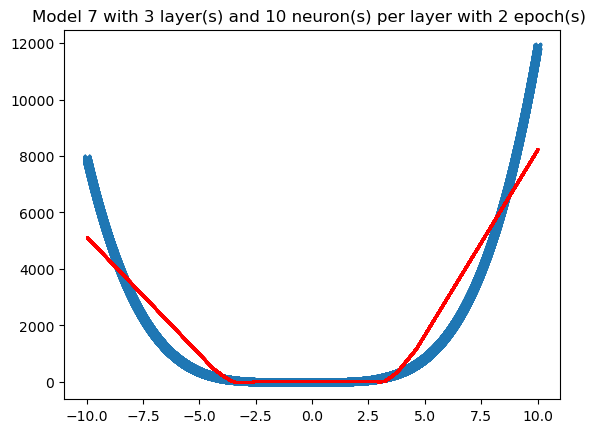

Epoch 1/2
3125/3125 [==============================] - 11s 3ms/step - loss: 3619378.0000
Epoch 2/2
3125/3125 [==============================] - 6s 2ms/step


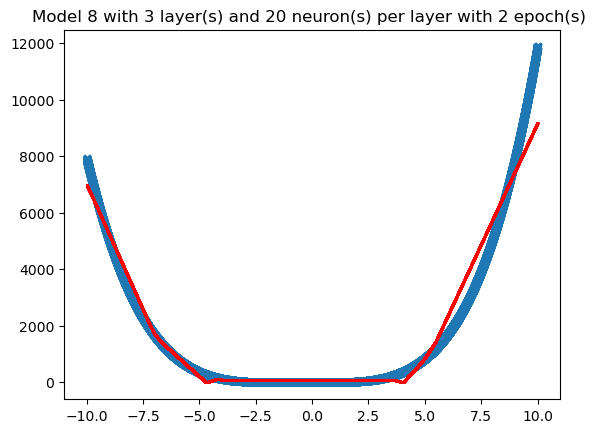

Epoch 1/2
3125/3125 [==============================] - 10s 3ms/step - loss: 2869605.7500
Epoch 2/2
3125/3125 [==============================] - 9s 3ms/step


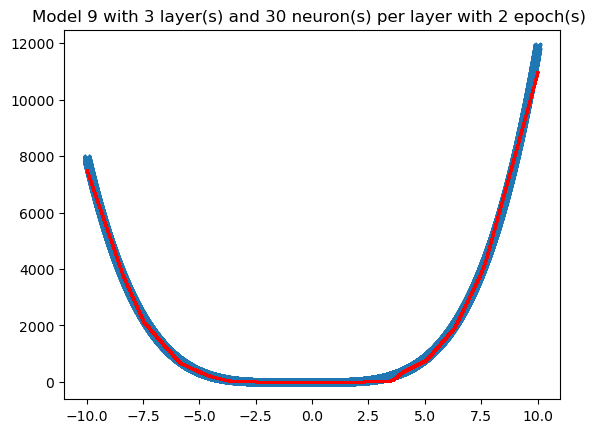

In [194]:
# Train each model and compare the results
for i, model in enumerate(models):
    epoch = 2
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError())
    model.fit(x, y_noise, epochs=epoch)
    # Get the predicted y values from the model
    y_pred = model.predict(x)
    # Plot the points and the predicted curve
    plt.scatter(x, y_noise, s=20, marker='x')
    plt.scatter(x, y_pred, c='r', s=0.2)
    plt.title(f'Model {i+1} with {len(model.layers)-1} layer(s) and {int(get_total_number_of_neurons(model, False)/(len(model.layers)-1))} neuron(s) per layer with {epoch} epoch(s) ')
    plt.show()


Exercice 3

In [195]:
import math
from keras.datasets import mnist

Q3 : visualisation de la fonction sigmoïde

In [196]:
def sigmoid(x):
    #On utilise l'exponentielle de tensorflow pour pouvoir l'appliquer élément par élément à un tenseur
    return 1/(1+tf.exp(-x))

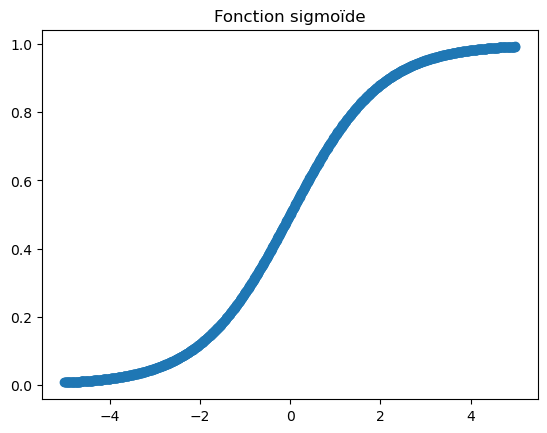

In [197]:
SigX = []
SigY=[]
for x in range(-500,500):
    SigX.append(x/100)
    SigY.append(sigmoid(x/100))
plt.scatter(SigX,SigY)
plt.title('Fonction sigmoïde')
plt.show()

In [198]:
#On importe le dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [199]:
# Définir la fonction d'erreur
def error(y_true, y_pred):
  return tf.math.square(y_true-y_pred)

In [200]:
def appr(x_train,y_train,epochs=10,alpha=0.01):

    # On fixe la seed globale
    tf.random.set_seed(5)

    # On initialise les poids du réseau de neurones aléatoirement
    W = tf.Variable(tf.random.normal((28*28,1)))

    # Boucle principale sur les époques
    for epoch in range(epochs):

        # Mélanger le jeu d'entraînement
        indices = tf.range(len(x_train))
        indices = tf.random.shuffle(indices)
        x_train = tf.gather(x_train, indices)
        y_train = tf.gather(y_train, indices)

        # Initialiser l'erreur cumulée
        cum_error = 0

        # Boucle sur les données d'entraînement
        for x, y in zip(x_train, y_train):

            # Convertir l'image en vecteur de réels normalisés
            x = tf.reshape(x, (28*28)) / 255

            # Convertir l'étiquette en vecteur binaire d'une dimension dont l'élément vaut 1 si y = 0 et 0 sinon
            y = tf.one_hot(y, depth=1)

            # Créer un gradient tape pour enregistrer les opérations
            with tf.GradientTape() as tape:

                # Calculer la sortie du réseau de neurones
                z = sigmoid(tf.tensordot(x, W, axes=1))

                # Calculer l'erreur locale
                e = error(y, z)

            # Mettre à jour l'erreur cumulée
            cum_error += e

            # Calculer le gradient de l'erreur par rapport aux poids
            de_dW = tape.gradient(e, W)

            # Mettre à jour les poids du réseau de neurones 
            W.assign_sub(alpha * de_dW)
    
    #On retourne le tenseur des poids pour pouvoir le conserver
    return W


In [201]:
y_test[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

In [202]:
tf.one_hot(y_test[4], depth=1)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [203]:
W = appr(x_train[:300],y_train[:300],epochs=10)

Partie 2

In [204]:
from PIL import Image

In [205]:
chiffre = Image.open("chiffre.png")

#inverser les couleurs (on a entrainé notre réseau sur des chiffres blancs sur fond noir)
chiffre = 255 - np.asarray(chiffre) 

#on garde la moyenne des 3 couleurs
chiffre = np.mean(chiffre,axis=2,dtype='float32')

#on créé le vecteur et on normalise
chiffre = tf.reshape(tf.Variable(chiffre), (28*28))/255

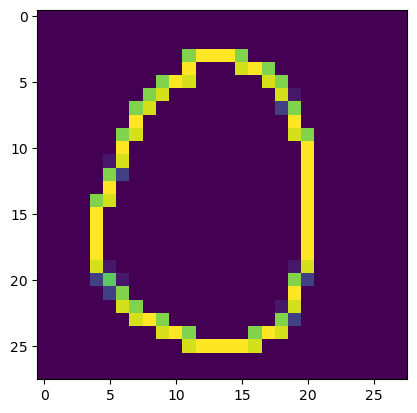

In [206]:
plt.imshow(tf.reshape(chiffre, (28,28))/255)

In [207]:
#Prédisons le chiffre en utilisant le modèle
sigmoid(tf.tensordot(chiffre , W, axes=1))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.13342898], dtype=float32)>

Mon chiffe tracé à la main est reconnu comme un 0 à 13%. <br>
On pourrait essayer d'entraîner le réseau de neurones sur une plus grosse partie du dataset ou augmenter le nombre d'époques lors de la phase d'entraînement

Inversons les couleurs:

In [208]:
chiffre=1-chiffre

In [209]:
sigmoid(tf.tensordot(chiffre , W, axes=1))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([4.1208873e-16], dtype=float32)>

Le chiffre n'est plus du tout reconnu (10^16 fois moins qu'avant)

Ces résultats sont mauvais, preuve :

In [210]:
TEST=[]
for i in range(2000):
    a=sigmoid(tf.tensordot(tf.reshape(x_test[i], (28*28))/255 , W, axes=1))
    if True:
        #print(i)
        TEST.append([y_test[i],float(a.numpy()[0])])
import pandas as pd
t = pd.DataFrame(TEST,columns=['y','y_pred'])

In [211]:
u = pd.pivot_table(t,values='y_pred',columns=['y'],aggfunc='mean')

In [212]:
u*100

y,0,1,2,3,4,5,6,7,8,9
y_pred,5.309166,1.037166,3.858629,1.557692,9.70238,6.985029,1.506576,5.909848,0.536277,5.700895


Le chiffre le plus souvent prédit comme un 0 est en fait 4... suivi de 5, 7, 9 et 8 puis enfin 0...<br>
Les données sont en pourcentages

On pourrait également penser à créer un jeu de données d'apprentissage où le nombre de 0 est égal à la somme du nombre de chaque autre chiffre pour éviter la situation de sous-apprentissage dans laquelle nous nous trouvons.

EX 4

In [219]:
import datetime

In [225]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
def create_model(width, heigth,depth,nbClasses):
  
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(heigth,width), name='layers_flatten'),
    tf.keras.layers.Dense(512, activation='relu', name='layers_dense'),
    tf.keras.layers.Dropout(0.2, name='layers_dropout'),
    tf.keras.layers.Dense(nbClasses, activation='softmax', name='layers_dense_2')
  ])

In [226]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_dataset = train_dataset.shuffle(60000).batch(64)
test_dataset = test_dataset.batch(64)

In [227]:
# Define our metrics
train_loss = tf.keras.metrics.Mean('train_loss', dtype=tf.float32)
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('train_accuracy')
test_loss = tf.keras.metrics.Mean('test_loss', dtype=tf.float32)
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('test_accuracy')

In [229]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [230]:
def train_step(model, optimizer, x_train, y_train):
  with tf.GradientTape() as tape:
    predictions = model(x_train, training=True)
    loss = loss_object(y_train, predictions)
  grads = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))

  train_loss(loss)
  train_accuracy(y_train, predictions)

We need to add a main program which creates a model and calls train_step num_epochs times